# Final Project - Group 8

## Overview
This notebook is part of the final project for Group 8. It includes steps for data loading, processing, and analysis.

### Importing Necessary Libraries
Here we import libraries necessary for database operations and data handling.

In [1]:
import sqlite3
import pandas as pd
import os
import numpy as np

### Database Connection and CSV Export
This section establishes a connection to the SQLite database and exports the required tables to CSV files.

In [2]:
# Path to your SQLite database
db_path = 'database.sqlite'

# Folder where you want to save the CSV files
csv_folder = 'CSV_Files'
os.makedirs(csv_folder, exist_ok=True)  # This creates the folder if it doesn't exist

# Connect to the SQLite database
conn = sqlite3.connect(db_path)

# List of tables to convert to CSV
tables = ['Player_Attributes', 'Player', 'Match', 'League', 'Country', 'Team', 'Team_Attributes']

# Iterate over each table and export it as a CSV file
for table in tables:
    # Read the table into a pandas DataFrame
    df = pd.read_sql_query(f"SELECT * FROM {table}", conn)

    # Export the DataFrame to a CSV file in the specified folder
    df.to_csv(os.path.join(csv_folder, f'{table}.csv'), index=False)

# Close the connection
conn.close()

# Path to your SQLite database
db_path = 'database.sqlite'

# Folder where you want to save the CSV files
csv_folder = 'CSV_Files'
os.makedirs(csv_folder, exist_ok=True)  # This creates the folder if it doesn't exist

# Connect to the SQLite database
conn = sqlite3.connect(db_path)

# List of tables to convert to CSV
tables = ['Player_Attributes', 'Player', 'Match', 'League', 'Country', 'Team', 'Team_Attributes']

# Iterate over each table and export it as a CSV file
for table in tables:
    # Read the table into a pandas DataFrame
    df = pd.read_sql_query(f"SELECT * FROM {table}", conn)

    # Export the DataFrame to a CSV file in the specified folder
    df.to_csv(os.path.join(csv_folder, f'{table}.csv'), index=False)

# Close the connection
conn.close()

### Loading Data into DataFrames
Now we load the exported CSV files into pandas DataFrames for further analysis.

In [3]:
# Load the CSV files into DataFrames
df_player_attributes = pd.read_csv('CSV_Files/Player_Attributes.csv')
df_player = pd.read_csv('CSV_Files/Player.csv')
df_match = pd.read_csv('CSV_Files/Match.csv')
df_league = pd.read_csv('CSV_Files/League.csv')
df_country = pd.read_csv('CSV_Files/Country.csv')
df_team = pd.read_csv('CSV_Files/Team.csv')
df_team_attributes = pd.read_csv('CSV_Files/Team_Attributes.csv')

In [4]:
# Display the first few rows of each DataFrame to understand their structure
print("Player Attributes:")
print(df_player_attributes.head())
print("\nPlayer:")
print(df_player.head())
print("\nMatch:")
print(df_match.head())
print("\nLeague:")
print(df_league.head())
print("\nCountry:")
print(df_country.head())
print("\nTeam:")
print(df_team.head())
print("\nTeam Attributes:")
print(df_team_attributes.head())


Player Attributes:
   id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00            67.0   
1   2              218353         505942  2015-11-19 00:00:00            67.0   
2   3              218353         505942  2015-09-21 00:00:00            62.0   
3   4              218353         505942  2015-03-20 00:00:00            61.0   
4   5              218353         505942  2007-02-22 00:00:00            61.0   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0       71.0          right              medium              medium      49.0   
1       71.0          right              medium              medium      49.0   
2       66.0          right              medium              medium      49.0   
3       65.0          right              medium              medium      48.0   
4       65.0          right              medium              medium      48.0   

   ... 

In [5]:
#  Basic Information
print("Basic Information:")
print(df_match.info())
print("\n")

#  Summary Statistics
print("Summary Statistics:")
print(df_match.describe())
print("\n")

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB
None


Summary Statistics:
                 id    country_id     league_id         stage  match_api_id  \
count  25979.000000  25979.000000  25979.000000  25979.000000  2.597900e+04   
mean   12990.000000  11738.630317  11738.630317     18.242773  1.195429e+06   
std     7499.635658   7553.936759   7553.936759     10.407354  4.946279e+05   
min        1.000000      1.000000      1.000000      1.000000  4.831290e+05   
25%     6495.500000   4769.000000   4769.000000      9.000000  7.684365e+05   
50%    12990.000000  10257.000000  10257.000000     18.000000  1.147511e+06   
75%    19484.500000  17642.000000  17642.000000     27.000000  1.709852e+06   
max    25979.000000  24558.000000  24558.000000     38.000000  2.216672e+06   

       home_team_api_id  away_team_api_id  home_team_goal  away_team_

### Importing Necessary Libraries
Here we import libraries necessary for database operations and data handling.

### Data Analysis

### Ligue 1: PSG's Transformation
 Analysis of PSG pre and post QSI takeover.

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from scipy.stats import entropy
import seaborn as sns

In [8]:
# Identifying PSG in the Team dataframe
psg_row = df_team[df_team['team_long_name'].str.contains("Paris Saint-Germain", na=False)]
psg_team_api_id = psg_row.iloc[0]['team_api_id']

# Filter matches involving PSG
psg_matches = df_match[(df_match['home_team_api_id'] == psg_team_api_id) | (df_match['away_team_api_id'] == psg_team_api_id)]

# Function to analyze team performance with average goals
def analyze_team_performance_with_averages(matches, team_api_id):
    home_matches = matches[matches['home_team_api_id'] == team_api_id]
    away_matches = matches[matches['away_team_api_id'] == team_api_id]

    home_wins = sum(home_matches['home_team_goal'] > home_matches['away_team_goal'])
    away_wins = sum(away_matches['away_team_goal'] > away_matches['home_team_goal'])
    total_wins = home_wins + away_wins

    home_draws = sum(home_matches['home_team_goal'] == home_matches['away_team_goal'])
    away_draws = sum(away_matches['away_team_goal'] == away_matches['home_team_goal'])
    total_draws = home_draws + away_draws

    total_losses = len(matches) - total_wins - total_draws

    home_goals_scored = home_matches['home_team_goal'].sum()
    away_goals_scored = away_matches['away_team_goal'].sum()
    total_goals_scored = home_goals_scored + away_goals_scored

    home_goals_conceded = home_matches['away_team_goal'].sum()
    away_goals_conceded = away_matches['home_team_goal'].sum()
    total_goals_conceded = home_goals_conceded + away_goals_conceded

    total_matches = len(matches)
    avg_goals_scored = total_goals_scored / total_matches if total_matches > 0 else 0
    avg_goals_conceded = total_goals_conceded / total_matches if total_matches > 0 else 0

    return {
        "wins": total_wins,
        "draws": total_draws,
        "losses": total_losses,
        "goals_scored": total_goals_scored,
        "goals_conceded": total_goals_conceded,
        "average_goals_scored": avg_goals_scored,
        "average_goals_conceded": avg_goals_conceded
    }

# Analyzing PSG's pre-QSI performance (up to 2010/2011 season)
psg_pre_qsi_matches = psg_matches[psg_matches['season'] <= '2010/2011']
psg_performance_pre_qsi = analyze_team_performance_with_averages(psg_pre_qsi_matches, psg_team_api_id)

# Analyzing PSG's post-QSI performance (from 2011/2012 season onwards)
psg_post_qsi_matches = psg_matches[psg_matches['season'] >= '2011/2012']
psg_performance_post_qsi = analyze_team_performance_with_averages(psg_post_qsi_matches, psg_team_api_id)

# Function to print formatted performance results
def print_performance_report(title, performance):
    print(f"{title}:\n" +
          f"Wins: {performance['wins']}\n" +
          f"Draws: {performance['draws']}\n" +
          f"Losses: {performance['losses']}\n" +
          f"Goals Scored: {performance['goals_scored']}\n" +
          f"Goals Conceded: {performance['goals_conceded']}\n" +
          f"Average Goals Scored per Match: {performance['average_goals_scored']:.2f}\n" +
          f"Average Goals Conceded per Match: {performance['average_goals_conceded']:.2f}\n")

# Displaying the formatted results
print_performance_report("PSG Performance Pre-QSI", psg_performance_pre_qsi)
print_performance_report("PSG Performance Post-QSI", psg_performance_post_qsi)


PSG Performance Pre-QSI:
Wins: 46
Draws: 33
Losses: 35
Goals Scored: 155
Goals Conceded: 125
Average Goals Scored per Match: 1.36
Average Goals Conceded per Match: 1.10

PSG Performance Post-QSI:
Wins: 129
Draws: 43
Losses: 18
Goals Scored: 413
Goals Conceded: 142
Average Goals Scored per Match: 2.17
Average Goals Conceded per Match: 0.75



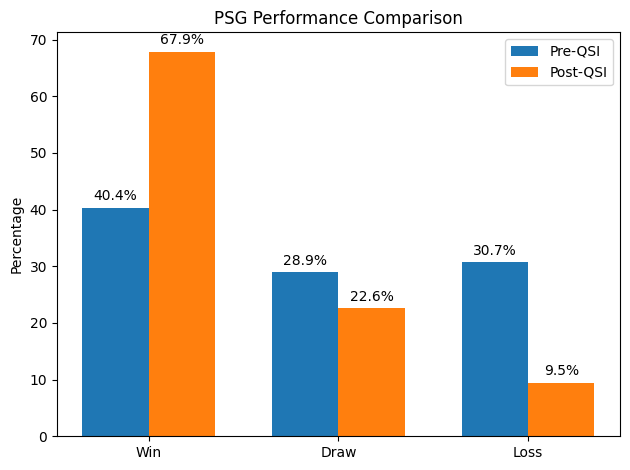

In [9]:
# Function to calculate the win, draw, and loss percentages
def calculate_percentages(performance):
    total_games = performance['wins'] + performance['draws'] + performance['losses']
    win_percentage = (performance['wins'] / total_games) * 100
    draw_percentage = (performance['draws'] / total_games) * 100
    loss_percentage = (performance['losses'] / total_games) * 100
    return win_percentage, draw_percentage, loss_percentage

# Calculate the percentages for pre-QSI and post-QSI
pre_qsi_percentages = calculate_percentages(psg_performance_pre_qsi)
post_qsi_percentages = calculate_percentages(psg_performance_post_qsi)

# Data for plotting
labels = ['Win', 'Draw', 'Loss']
pre_qsi_values = [pre_qsi_percentages[0], pre_qsi_percentages[1], pre_qsi_percentages[2]]
post_qsi_values = [post_qsi_percentages[0], post_qsi_percentages[1], post_qsi_percentages[2]]

x = range(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, pre_qsi_values, width, label='Pre-QSI')
rects2 = ax.bar([p + width for p in x], post_qsi_values, width, label='Post-QSI')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('PSG Performance Comparison')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

# Function to attach a text label above each bar, displaying its height.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.1f%%' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function to attach the labels
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

# Display the plot
plt.show()


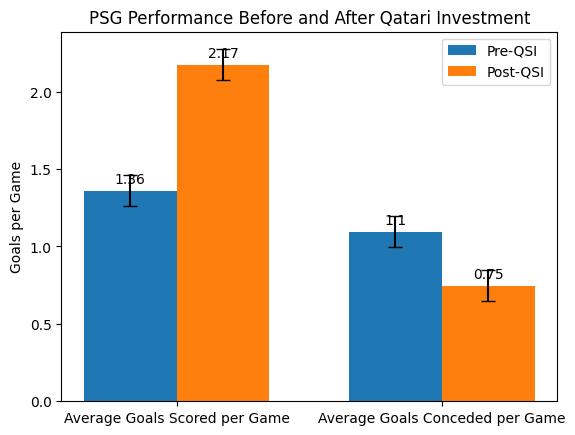

In [10]:
# Calculate the average goals per game for pre-QSI and post-QSI
avg_goals_scored_pre_qsi = psg_performance_pre_qsi['average_goals_scored']
avg_goals_conceded_pre_qsi = psg_performance_pre_qsi['average_goals_conceded']
avg_goals_scored_post_qsi = psg_performance_post_qsi['average_goals_scored']
avg_goals_conceded_post_qsi = psg_performance_post_qsi['average_goals_conceded']

# Set the labels and values for the bar chart
labels = ['Average Goals Scored per Game', 'Average Goals Conceded per Game']
pre_qsi_values = [avg_goals_scored_pre_qsi, avg_goals_conceded_pre_qsi]
post_qsi_values = [avg_goals_scored_post_qsi, avg_goals_conceded_post_qsi]

# Define the x locations for the groups
x = np.arange(len(labels))

# Define the width of the bars
width = 0.35

# Create the bar chart
fig, ax = plt.subplots()

# Define the bars for pre-QSI and post-QSI values
rects1 = ax.bar(x - width/2, pre_qsi_values, width, label='Pre-QSI', color='#1f77b4', yerr=[0.1, 0.1], capsize=5)
rects2 = ax.bar(x + width/2, post_qsi_values, width, label='Post-QSI', color='#ff7f0e', yerr=[0.1, 0.1], capsize=5)

# Add some text for labels, title and custom x-axis tick labels
ax.set_ylabel('Goals per Game')
ax.set_title('PSG Performance Before and After Qatari Investment')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to attach a text label above each bar
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function to attach the labels
autolabel(rects1)
autolabel(rects2)

# Display the plot
plt.show()


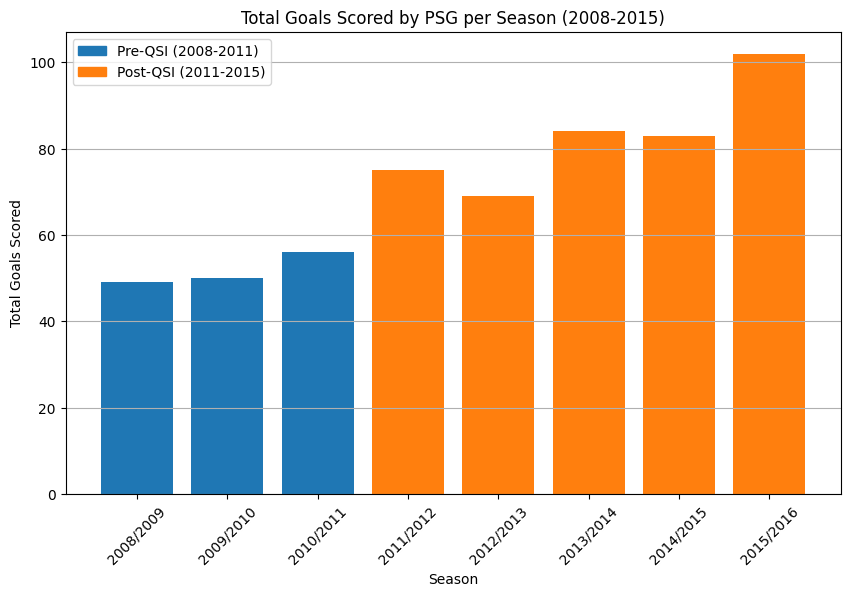

In [11]:
# Creating a copy of the sliced DataFrame to avoid SettingWithCopyWarning
psg_matches_copy = psg_matches.copy()

# Extracting and summing the goals scored by PSG for each season
psg_matches_copy['season_goals_scored'] = psg_matches_copy.apply(lambda row: row['home_team_goal'] if row['home_team_api_id'] == psg_team_api_id else row['away_team_goal'], axis=1)
goals_scored_by_season = psg_matches_copy.groupby('season')['season_goals_scored'].sum().reset_index()


# Colors for pre-QSI (2008-2011) and post-QSI (2011-2015)
pre_qsi_color = '#1f77b4'
post_qsi_color = '#ff7f0e'

# Assigning colors based on the pre-QSI and post-QSI periods
colors = [pre_qsi_color if season <= '2010/2011' else post_qsi_color for season in goals_scored_by_season['season']]

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(goals_scored_by_season['season'], goals_scored_by_season['season_goals_scored'], color=colors)
plt.xlabel('Season')
plt.ylabel('Total Goals Scored')
plt.title('Total Goals Scored by PSG per Season (2008-2015)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Creating custom legend handles
pre_qsi_patch = mpatches.Patch(color=pre_qsi_color, label='Pre-QSI (2008-2011)')
post_qsi_patch = mpatches.Patch(color=post_qsi_color, label='Post-QSI (2011-2015)')

# Adding the legend with custom handles
plt.legend(handles=[pre_qsi_patch, post_qsi_patch], loc='upper left')

# Show the plot
plt.show()


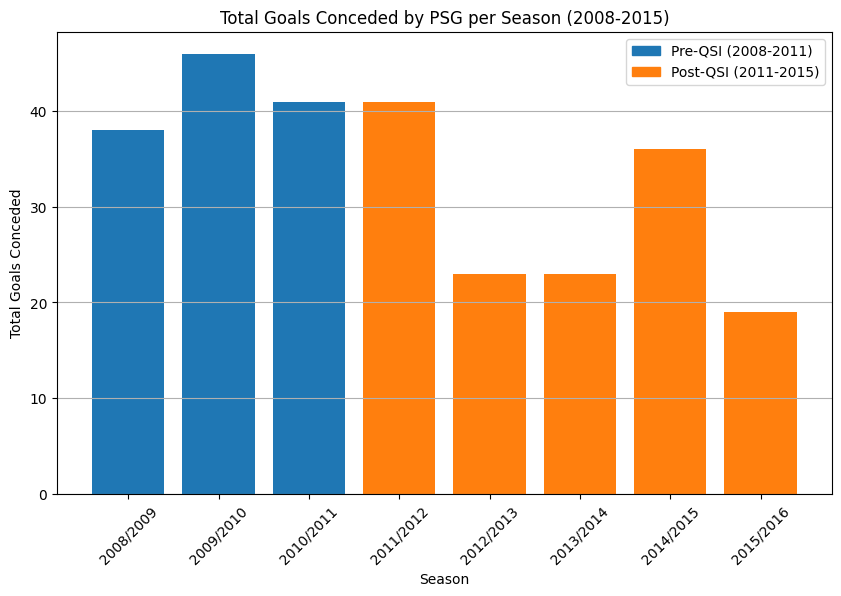

In [50]:
psg_team_api_id = 9847  # PSG team API ID

# Filter matches involving PSG
psg_matches = df_match[(df_match['home_team_api_id'] == psg_team_api_id) | (df_match['away_team_api_id'] == psg_team_api_id)]

# Creating a copy of the sliced DataFrame to avoid SettingWithCopyWarning
psg_matches_copy = psg_matches.copy()

# Extracting and summing the goals conceded by PSG for each season
psg_matches_copy['season_goals_conceded'] = psg_matches_copy.apply(lambda row: row['away_team_goal'] if row['home_team_api_id'] == psg_team_api_id else row['home_team_goal'], axis=1)
goals_conceded_by_season = psg_matches_copy.groupby('season')['season_goals_conceded'].sum().reset_index()

# Assigning colors based on the pre-QSI (2008-2011) and post-QSI (2011-2015) periods
colors = ['#1f77b4' if season <= '2010/2011' else '#ff7f0e' for season in goals_conceded_by_season['season']]

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(goals_conceded_by_season['season'], goals_conceded_by_season['season_goals_conceded'], color=colors)
plt.xlabel('Season')
plt.ylabel('Total Goals Conceded')
plt.title('Total Goals Conceded by PSG per Season (2008-2015)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Creating custom legend handles for pre-QSI and post-QSI periods
pre_qsi_patch = mpatches.Patch(color='#1f77b4', label='Pre-QSI (2008-2011)')
post_qsi_patch = mpatches.Patch(color='#ff7f0e', label='Post-QSI (2011-2015)')

# Adding the legend with custom handles
plt.legend(handles=[pre_qsi_patch, post_qsi_patch], loc='upper right')

# Show the plot
plt.show()


### Laliga BBVA: The Predictability of Dominance



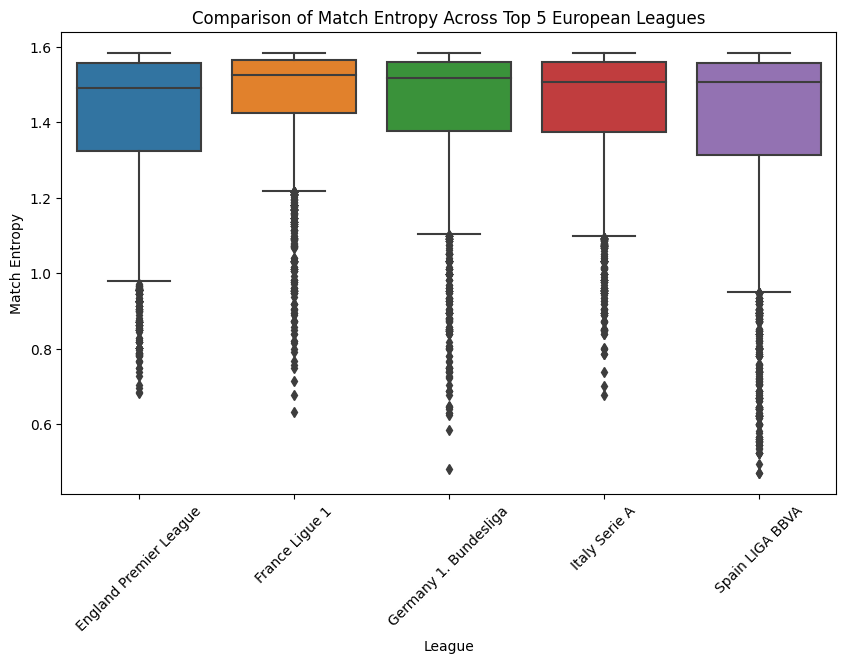

In [13]:

# Filter for the top 5 European leagues
top_5_leagues_names = ['England', 'France', 'Germany', 'Italy', 'Spain']
top_5_leagues = df_league[df_league['name'].str.contains('|'.join(top_5_leagues_names))]

# Merge match data with league data
df_match_top_5 = df_match[df_match['league_id'].isin(top_5_leagues['id'])]
df_match_top_5 = df_match_top_5.merge(top_5_leagues, left_on='league_id', right_on='id', suffixes=('', '_league'))

# Drop rows with missing betting odds
df_match_top_5 = df_match_top_5.dropna(subset=['B365H', 'B365D', 'B365A'])

# Function to calculate entropy
def match_entropy(row):
    odds = [row['B365H'], row['B365D'], row['B365A']]
    probabilities = [1/o for o in odds]
    total = sum(probabilities)
    normalized_probs = [p/total for p in probabilities]
    return entropy(normalized_probs, base=2)

# Apply the entropy function to each match
df_match_top_5['entropy'] = df_match_top_5.apply(match_entropy, axis=1)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='name', y='entropy', data=df_match_top_5)
plt.xticks(rotation=45)
plt.xlabel('League')
plt.ylabel('Match Entropy')
plt.title('Comparison of Match Entropy Across Top 5 European Leagues')
plt.show()


In [14]:
# Extracting La Liga data
la_liga_matches = df_match_top_5[df_match_top_5['name'] == 'Spain LIGA BBVA']

# Selecting relevant columns
relevant_columns = [
    'season', 'date', 'home_team_api_id', 'away_team_api_id', 
    'home_team_goal', 'away_team_goal'
]
la_liga_matches = la_liga_matches[relevant_columns]

# Handling missing values (assuming goals might be the main concern)
la_liga_matches['home_team_goal'].fillna(la_liga_matches['home_team_goal'].median(), inplace=True)
la_liga_matches['away_team_goal'].fillna(la_liga_matches['away_team_goal'].median(), inplace=True)

# Creating a target variable for match outcome
la_liga_matches['outcome'] = la_liga_matches.apply(
    lambda row: 1 if row['home_team_goal'] > row['away_team_goal'] else 
                (-1 if row['home_team_goal'] < row['away_team_goal'] else 0), 
    axis=1
)

# Encoding categorical variables - 'season'
label_encoder = LabelEncoder()
la_liga_matches['season_encoded'] = label_encoder.fit_transform(la_liga_matches['season'])

# Features and target variable
features = la_liga_matches[['season_encoded', 'home_team_api_id', 'away_team_api_id']]
target = la_liga_matches['outcome']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
predictions = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, predictions))
print('Classification Report:\n', classification_report(y_test, predictions))

Accuracy: 0.5049342105263158
Classification Report:
               precision    recall  f1-score   support

          -1       0.43      0.40      0.42       171
           0       0.34      0.27      0.30       136
           1       0.59      0.67      0.63       301

    accuracy                           0.50       608
   macro avg       0.45      0.45      0.45       608
weighted avg       0.49      0.50      0.50       608



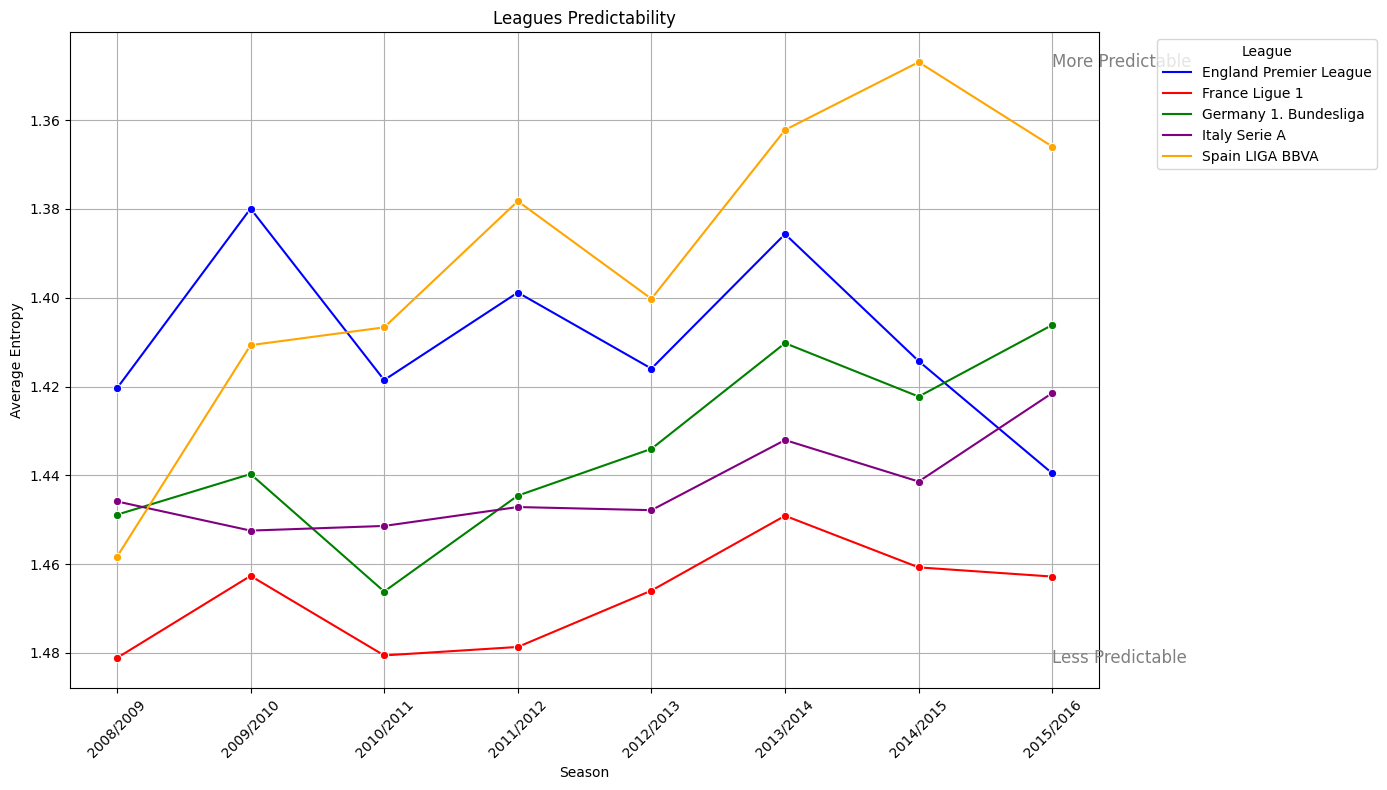

In [51]:
# First, calculate the average entropy for each league and season.
average_entropy_per_league_season = df_match_top_5.groupby(['name', 'season'])['entropy'].mean().reset_index()

# Define a color palette for the leagues, ensure these are distinct
league_colors = {
    'England Premier League': 'blue',
    'France Ligue 1': 'red',
    'Germany 1. Bundesliga': 'green',
    'Italy Serie A': 'purple',
    'Spain LIGA BBVA': 'orange'
}

# Create the line plot with distinct colors
plt.figure(figsize=(14, 8))  # Adjust the size to your preference
sns.lineplot(data=average_entropy_per_league_season, x='season', y='entropy', hue='name', 
             palette=league_colors, marker='o')

# Invert the y-axis to show more predictable (low entropy) at the bottom
plt.gca().invert_yaxis()

# Add a legend outside the plot
plt.legend(title='League', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add annotations for clarity
plt.text(x=average_entropy_per_league_season['season'].iloc[-1], y=average_entropy_per_league_season['entropy'].max(), 
         s="Less Predictable", verticalalignment='center', horizontalalignment='left', color='grey', fontsize=12)
plt.text(x=average_entropy_per_league_season['season'].iloc[-1], y=average_entropy_per_league_season['entropy'].min(), 
         s="More Predictable", verticalalignment='center', horizontalalignment='left', color='grey', fontsize=12)

# Additional customizations
plt.xticks(rotation=45)
plt.xlabel('Season')
plt.ylabel('Average Entropy')
plt.title('Leagues Predictability')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


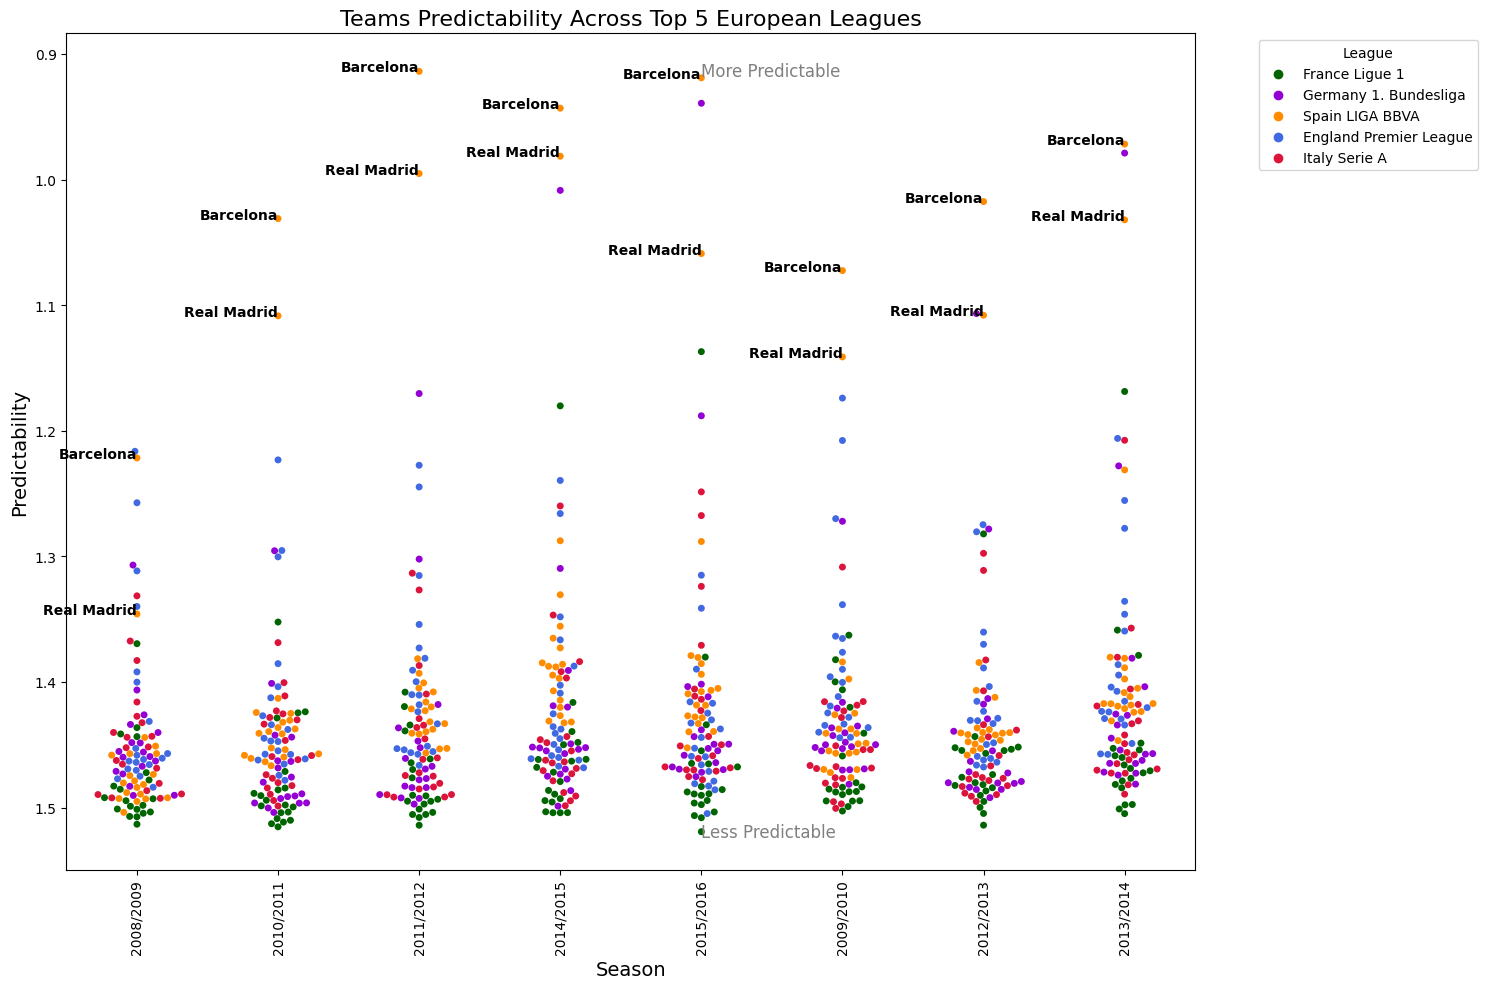

In [16]:
# Function to calculate match entropy
def match_entropy(row):
    odds = [row['B365H'], row['B365D'], row['B365A']]
    probabilities = [1/o for o in odds if o > 0]  # Check to avoid division by zero
    total = sum(probabilities)
    normalized_probs = [p/total for p in probabilities]
    return entropy(normalized_probs, base=2)

# Filter for the top 5 European leagues
top_5_leagues_names = ['Spain LIGA BBVA', 'England Premier League', 'France Ligue 1', 'Italy Serie A', 'Germany 1. Bundesliga']
df_leagues_filtered = df_league[df_league['name'].isin(top_5_leagues_names)]

# Filter matches for these leagues
df_matches_filtered = df_match[df_match['league_id'].isin(df_leagues_filtered['id'])]
df_matches_filtered = df_matches_filtered[['id', 'country_id', 'league_id', 'season', 'stage', 'date',
                                           'match_api_id', 'home_team_api_id', 'away_team_api_id',
                                           'B365H', 'B365D', 'B365A']].dropna()

# Calculate entropy for each match
df_matches_filtered['entropy'] = df_matches_filtered.apply(match_entropy, axis=1)

# Calculate the average entropy for each team in each season
home_entropy = df_matches_filtered.groupby(['season', 'home_team_api_id']).entropy.mean().reset_index()
away_entropy = df_matches_filtered.groupby(['season', 'away_team_api_id']).entropy.mean().reset_index()

# Rename columns for merging
home_entropy.rename(columns={'home_team_api_id': 'team_api_id', 'entropy': 'home_entropy'}, inplace=True)
away_entropy.rename(columns={'away_team_api_id': 'team_api_id', 'entropy': 'away_entropy'}, inplace=True)

# Merge home and away entropies and calculate average
team_entropy = pd.merge(home_entropy, away_entropy, on=['season', 'team_api_id'], how='outer')
team_entropy['mean_entropy'] = (team_entropy['home_entropy'] + team_entropy['away_entropy']) / 2

# Merge to get the league names for each team
team_league_mapping = df_matches_filtered[['home_team_api_id', 'league_id']].drop_duplicates()
team_league_mapping.rename(columns={'home_team_api_id': 'team_api_id'}, inplace=True)
team_entropy = team_entropy.merge(team_league_mapping, on='team_api_id')
team_entropy = team_entropy.merge(df_league[['id', 'name']], left_on='league_id', right_on='id')

# Merge to get the team names
team_entropy = team_entropy.merge(df_team[['team_api_id', 'team_long_name']], on='team_api_id')

# Filter for top 5 leagues and prepare for plotting
team_entropy_top_leagues = team_entropy[team_entropy['name'].isin(top_5_leagues_names)]
team_entropy_top_leagues = team_entropy_top_leagues[['season', 'team_long_name', 'name', 'mean_entropy']]

# Define a new color palette
league_colors = {
    'Spain LIGA BBVA': 'darkorange',
    'England Premier League': 'royalblue',
    'France Ligue 1': 'darkgreen',
    'Italy Serie A': 'crimson',
    'Germany 1. Bundesliga': 'darkviolet'
}

# Create the swarm plot
plt.figure(figsize=(15, 10))
sns.swarmplot(
    data=team_entropy_top_leagues,
    x='season',
    y='mean_entropy',
    hue='name',
    palette=league_colors,
    size=5
)
plt.gca().invert_yaxis()

# Identifying the team_api_id for Barcelona and Real Madrid
barcelona_id = df_team[df_team['team_long_name'] == 'FC Barcelona']['team_api_id'].iloc[0]
real_madrid_id = df_team[df_team['team_long_name'] == 'Real Madrid CF']['team_api_id'].iloc[0]

# Label Barcelona and Real Madrid points
for season in team_entropy_top_leagues['season'].unique():
    # Get the mean entropy for Barcelona and Real Madrid for each season
    barca_entropy = team_entropy_top_leagues[
        (team_entropy_top_leagues['team_long_name'] == 'FC Barcelona') & 
        (team_entropy_top_leagues['season'] == season)
    ]['mean_entropy'].values
    real_entropy = team_entropy_top_leagues[
        (team_entropy_top_leagues['team_long_name'] == 'Real Madrid CF') & 
        (team_entropy_top_leagues['season'] == season)
    ]['mean_entropy'].values
    if barca_entropy.size > 0:
        plt.text(season, barca_entropy[0], 'Barcelona', horizontalalignment='right', size='medium', color='black', weight='semibold')
    if real_entropy.size > 0:
        plt.text(season, real_entropy[0], 'Real Madrid', horizontalalignment='right', size='medium', color='black', weight='semibold')

# Add annotations for predictability
plt.text(x=team_entropy_top_leagues['season'].max(), y=team_entropy_top_leagues['mean_entropy'].min(),
         s="More Predictable", verticalalignment='center', horizontalalignment='left', color='grey', fontsize=12)
plt.text(x=team_entropy_top_leagues['season'].max(), y=team_entropy_top_leagues['mean_entropy'].max(),
         s="Less Predictable", verticalalignment='center', horizontalalignment='left', color='grey', fontsize=12)

plt.xticks(rotation=90)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Predictability', fontsize=14)
plt.title('Teams Predictability Across Top 5 European Leagues', fontsize=16)
plt.legend(title='League', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Bundesliga: A tale of two Giants.
1. Analysis of Bayern Munich and Borussia Dortmund's performances.
2. Focus on Dortmund's 2011/12 and 2014/15 seasons.

In [17]:
# Find the league_id for Bundesliga
bundesliga_id = df_league[df_league['name'] == 'Germany 1. Bundesliga']['id'].iloc[0]

# Filter the match DataFrame for Bundesliga matches
bundesliga_matches = df_match[df_match['league_id'] == bundesliga_id]

bundesliga_id

7809

In [59]:
# Create a new DataFrame to avoid SettingWithCopyWarning
bundesliga_points = bundesliga_matches.copy()

# Function to assign points based on match results
def assign_points(row):
    home_goals = row['home_team_goal']
    away_goals = row['away_team_goal']
    
    if home_goals > away_goals:
        return 3  # Home win
    elif home_goals < away_goals:
        return 0  # Away win
    else:
        return 1  # Draw

# Assign points for home and away teams
bundesliga_points['home_points'] = bundesliga_matches.apply(lambda row: assign_points(row), axis=1)
bundesliga_points['away_points'] = bundesliga_matches.apply(lambda row: 3 - assign_points(row), axis=1)

# Concatenate home and away matches
all_matches = pd.concat([bundesliga_points[['season', 'home_team_api_id', 'home_points']],
                         bundesliga_points[['season', 'away_team_api_id', 'away_points']].rename(columns={'away_team_api_id': 'home_team_api_id', 'away_points': 'home_points'})])

# Group by season and team, summing up the points
team_performance_over_seasons = all_matches.groupby(['season', 'home_team_api_id'])['home_points'].sum().reset_index()

# Merge the 'team' DataFrame to get team names
team_performance_over_seasons = team_performance_over_seasons.merge(
    df_team[['team_api_id', 'team_long_name']],
    left_on='home_team_api_id',
    right_on='team_api_id',
    how='left'
)

# Drop the 'home_team_api_id' and 'team_api_id' columns as we now have the team names
team_performance_over_seasons = team_performance_over_seasons.drop(columns=['home_team_api_id', 'team_api_id'])

# Sort the DataFrame by season and points in descending order
team_performance_over_seasons = team_performance_over_seasons.sort_values(by=['season', 'home_points'], ascending=[True, False])

# Reset the index
team_performance_over_seasons = team_performance_over_seasons.reset_index(drop=True)


team_performance_over_seasons

,season,home_points,team_long_name
0,2008/2009,74,VfL Wolfsburg
1,2008/2009,72,FC Bayern Munich
2,2008/2009,68,VfB Stuttgart
3,2008/2009,66,Hertha BSC Berlin
4,2008/2009,64,Borussia Dortmund
...,...,...,...
139,2015/2016,41,TSG 1899 Hoffenheim
140,2015/2016,41,SV Werder Bremen
141,2015/2016,39,Eintracht Frankfurt
142,2015/2016,38,VfB Stuttgart


In [21]:
# Replace 'df_team' with the name of your team DataFrame
bayern_munich_id = df_team[df_team['team_long_name'] == 'FC Bayern Munich']['team_api_id'].iloc[0]
dortmund_id = df_team[df_team['team_long_name'] == 'Borussia Dortmund']['team_api_id'].iloc[0]


In [22]:
# Filter the performance DataFrame for Bayern Munich and Borussia Dortmund
bayern_performance = team_performance_over_seasons[team_performance_over_seasons['team_api_id'] == bayern_munich_id]
dortmund_performance = team_performance_over_seasons[team_performance_over_seasons['team_api_id'] == dortmund_id]

# Sort the data by season to ensure the line chart follows chronological order
bayern_performance = bayern_performance.sort_values('season')
dortmund_performance = dortmund_performance.sort_values('season')


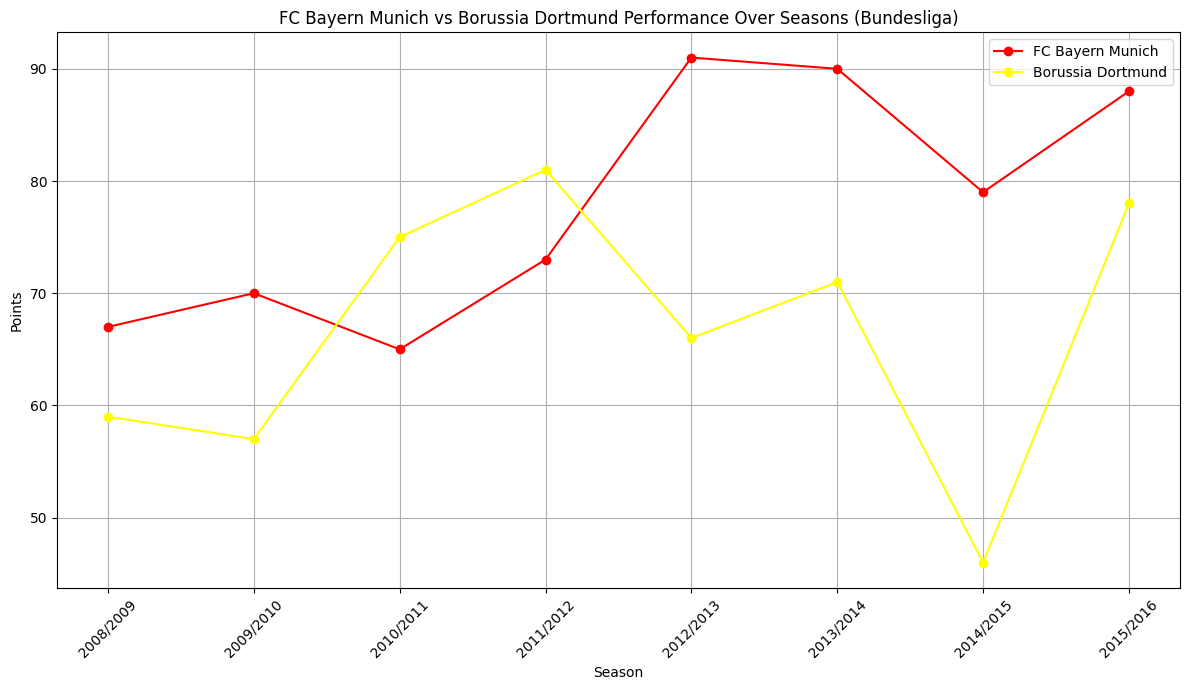

In [23]:
# Combined visualization to compare both teams
plt.figure(figsize=(12, 7))
plt.plot(bayern_performance['season'], bayern_performance['points'], marker='o', color='red', label='FC Bayern Munich')
plt.plot(dortmund_performance['season'], dortmund_performance['points'], marker='o', color='yellow', label='Borussia Dortmund')
plt.title("FC Bayern Munich vs Borussia Dortmund Performance Over Seasons (Bundesliga)")
plt.xlabel("Season")
plt.ylabel("Points")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#### The 2011/2012 season shows Dortmund peaking, possibly indicating they won the Bundesliga or performed exceptionally well that season.
#### The 2014/2015 season stands out for Dortmund with a sharp decline, which is an area for further investigation to understand the reasons behind this poor performance.

### Let's compare Dortmund's 2014/2015(worst) season with 2011/2012(best) season.

In [27]:
# Filter matches for the 2014/2015 season involving Borussia Dortmund
dortmund_matches_1415 = df_match[(df_match['season'] == '2014/2015') &
                                  ((df_match['home_team_api_id'] == dortmund_id) |
                                   (df_match['away_team_api_id'] == dortmund_id))].copy()

# Use .loc to avoid SettingWithCopyWarning
dortmund_matches_1415.loc[:, 'dortmund_goals'] = dortmund_matches_1415.apply(
    lambda row: row['home_team_goal'] if row['home_team_api_id'] == dortmund_id else row['away_team_goal'], axis=1)

dortmund_matches_1415.loc[:, 'opponent_goals'] = dortmund_matches_1415.apply(
    lambda row: row['away_team_goal'] if row['home_team_api_id'] == dortmund_id else row['home_team_goal'], axis=1)

dortmund_matches_1415.loc[:, 'clean_sheet'] = dortmund_matches_1415['opponent_goals'] == 0

dortmund_matches_1415.loc[:, 'result'] = dortmund_matches_1415.apply(
    lambda row: 'win' if row['dortmund_goals'] > row['opponent_goals'] else ('draw' if row['dortmund_goals'] == row['opponent_goals'] else 'loss'), axis=1)

# Now you can safely aggregate the stats without triggering the warning
dortmund_season_summary_1415 = {
    'goals_scored': dortmund_matches_1415['dortmund_goals'].sum(),
    'goals_conceded': dortmund_matches_1415['opponent_goals'].sum(),
    'clean_sheets': dortmund_matches_1415['clean_sheet'].sum(),
    'wins': (dortmund_matches_1415['result'] == 'win').sum(),
    'draws': (dortmund_matches_1415['result'] == 'draw').sum(),
    'losses': (dortmund_matches_1415['result'] == 'loss').sum(),
}

dortmund_season_summary_1415

{'goals_scored': 47,
 'goals_conceded': 42,
 'clean_sheets': 10,
 'wins': 13,
 'draws': 7,
 'losses': 14}

In [28]:
# Filter matches for the 2011/2012 season involving Borussia Dortmund
dortmund_matches_1112 = df_match[(df_match['season'] == '2011/2012') &
                                  ((df_match['home_team_api_id'] == dortmund_id) |
                                   (df_match['away_team_api_id'] == dortmund_id))].copy()

# Use .loc to safely make assignments
dortmund_matches_1112.loc[:, 'dortmund_goals'] = dortmund_matches_1112.apply(
    lambda row: row['home_team_goal'] if row['home_team_api_id'] == dortmund_id else row['away_team_goal'], axis=1)

dortmund_matches_1112.loc[:, 'opponent_goals'] = dortmund_matches_1112.apply(
    lambda row: row['away_team_goal'] if row['home_team_api_id'] == dortmund_id else row['home_team_goal'], axis=1)

dortmund_matches_1112.loc[:, 'clean_sheet'] = dortmund_matches_1112['opponent_goals'] == 0

dortmund_matches_1112.loc[:, 'result'] = dortmund_matches_1112.apply(
    lambda row: 'win' if row['dortmund_goals'] > row['opponent_goals'] else ('draw' if row['dortmund_goals'] == row['opponent_goals'] else 'loss'), axis=1)

# Aggregate the stats
dortmund_season_summary_1112 = {
    'goals_scored': dortmund_matches_1112['dortmund_goals'].sum(),
    'goals_conceded': dortmund_matches_1112['opponent_goals'].sum(),
    'clean_sheets': dortmund_matches_1112['clean_sheet'].sum(),
    'wins': (dortmund_matches_1112['result'] == 'win').sum(),
    'draws': (dortmund_matches_1112['result'] == 'draw').sum(),
    'losses': (dortmund_matches_1112['result'] == 'loss').sum(),
}

dortmund_season_summary_1112


{'goals_scored': 80,
 'goals_conceded': 25,
 'clean_sheets': 15,
 'wins': 25,
 'draws': 6,
 'losses': 3}

In [29]:
comparison_df = pd.DataFrame({
    '2011/2012': dortmund_season_summary_1112,
    '2014/2015': dortmund_season_summary_1415
})

comparison_df

,2011/2012,2014/2015
goals_scored,80,47
goals_conceded,25,42
clean_sheets,15,10
wins,25,13
draws,6,7
losses,3,14


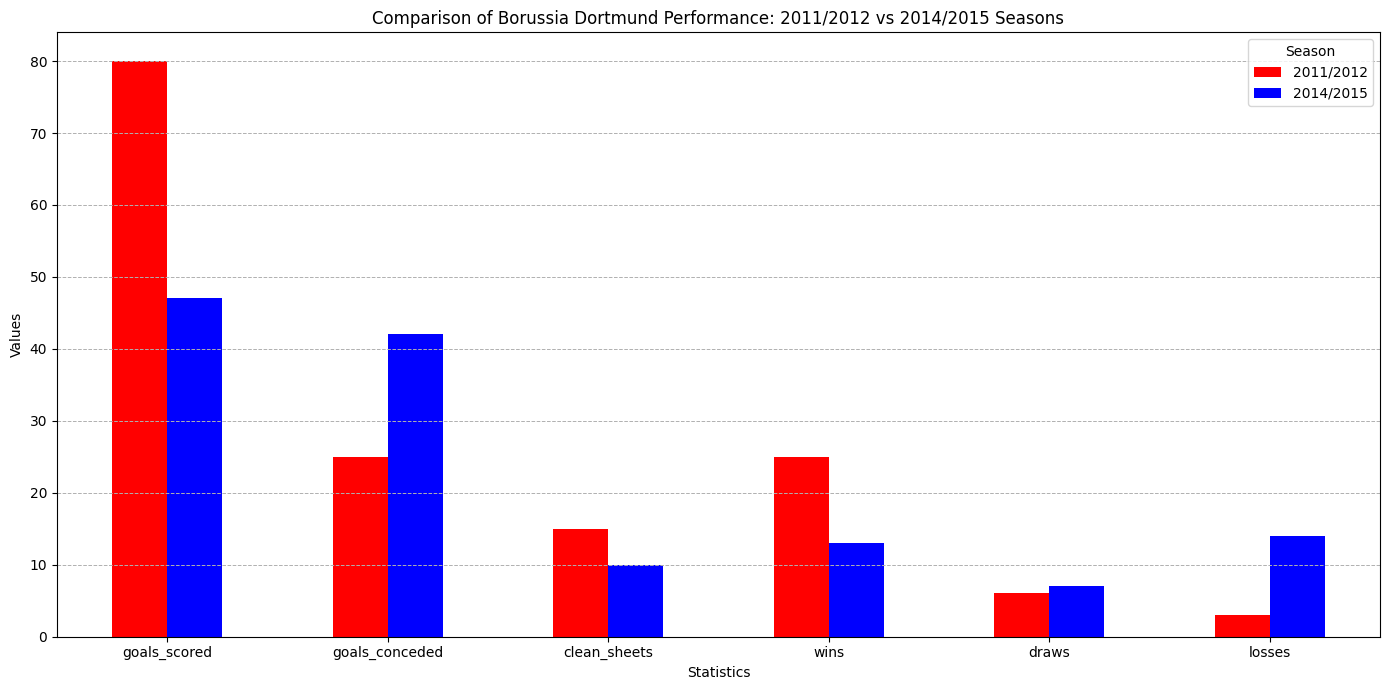

In [30]:
# Create a bar chart to compare the performance of both seasons
comparison_df.plot(kind='bar', figsize=(14, 7), color=['red', 'blue'])

# Title and labels
plt.title('Comparison of Borussia Dortmund Performance: 2011/2012 vs 2014/2015 Seasons')
plt.xlabel('Statistics')
plt.ylabel('Values')
plt.xticks(rotation=0)  # Rotate x-axis labels to show them horizontally
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Show the legend
plt.legend(title='Season')

# Display the plot
plt.tight_layout()
plt.show()

### Premier League: The Ferguson Effect
1. Manchester United's performance with vs. without Sir Alex Ferguson.

In [31]:
# Filtering the df_match dataset for only English Premier League matches
# First, identify the league_id for the English Premier League from df_league
epl_league_id = df_league[df_league['name'] == 'England Premier League']['id'].iloc[0]

epl_league_id

# Now, filter the df_match DataFrame using this league_id
df_epl_matches = df_match[df_match['league_id'] == epl_league_id]

In [33]:
# Merging the total_points DataFrame with the df_team DataFrame to get team names
total_points_with_names = total_points.merge(df_team[['team_api_id', 'team_long_name']], left_on='team_api_id', right_on='team_api_id')

# Renaming the columns for clarity
total_points_with_names.rename(columns={'team_long_name': 'team_name'}, inplace=True)

# Dropping the team_api_id column as it's no longer needed
total_points_with_names.drop(columns=['team_api_id'], inplace=True)

# Displaying the first few rows of the DataFrame with team names
total_points_with_names


,season,points,team_name
0,2008/2009,83,Chelsea
1,2009/2010,86,Chelsea
2,2010/2011,71,Chelsea
3,2011/2012,64,Chelsea
4,2012/2013,75,Chelsea
...,...,...,...
155,2015/2016,42,Crystal Palace
156,2014/2015,41,Leicester City
157,2015/2016,81,Leicester City
158,2015/2016,42,Bournemouth


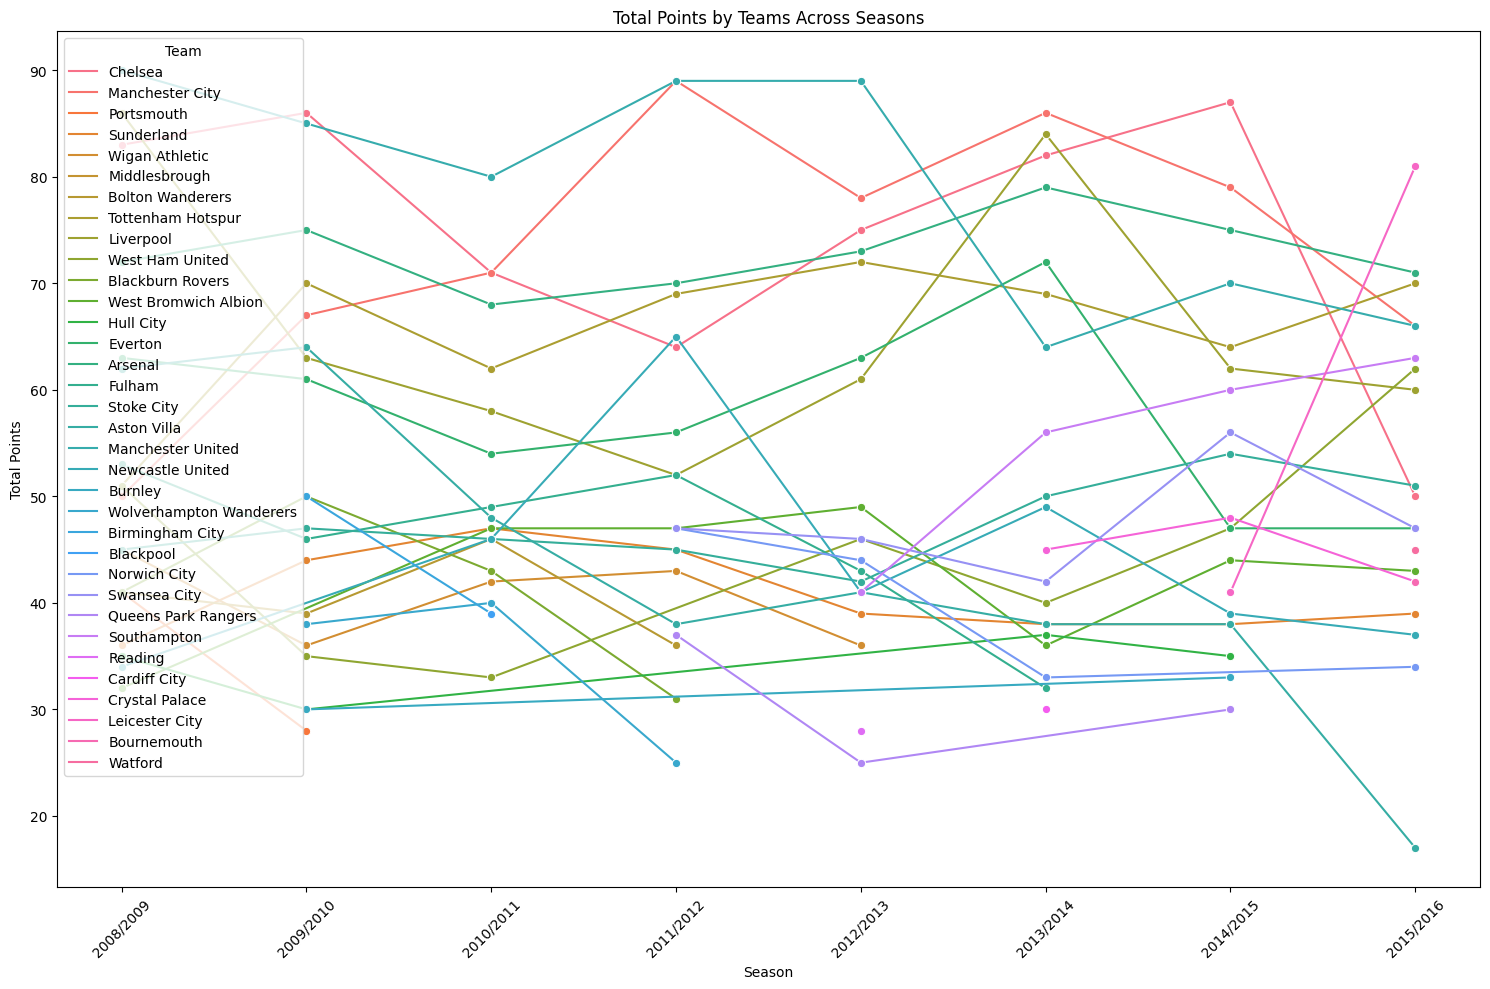

In [34]:
# Creating a line chart
plt.figure(figsize=(15, 10))
sns.lineplot(data=total_points_with_names, x='season', y='points', hue='team_name', marker='o')

plt.title('Total Points by Teams Across Seasons')
plt.xlabel('Season')
plt.ylabel('Total Points')
plt.xticks(rotation=45)
plt.legend(title='Team', loc='upper left')
plt.tight_layout()
plt.show()

#### This graph tries to show how many points football teams got each season, but it's hard to understand because it's too busy. 

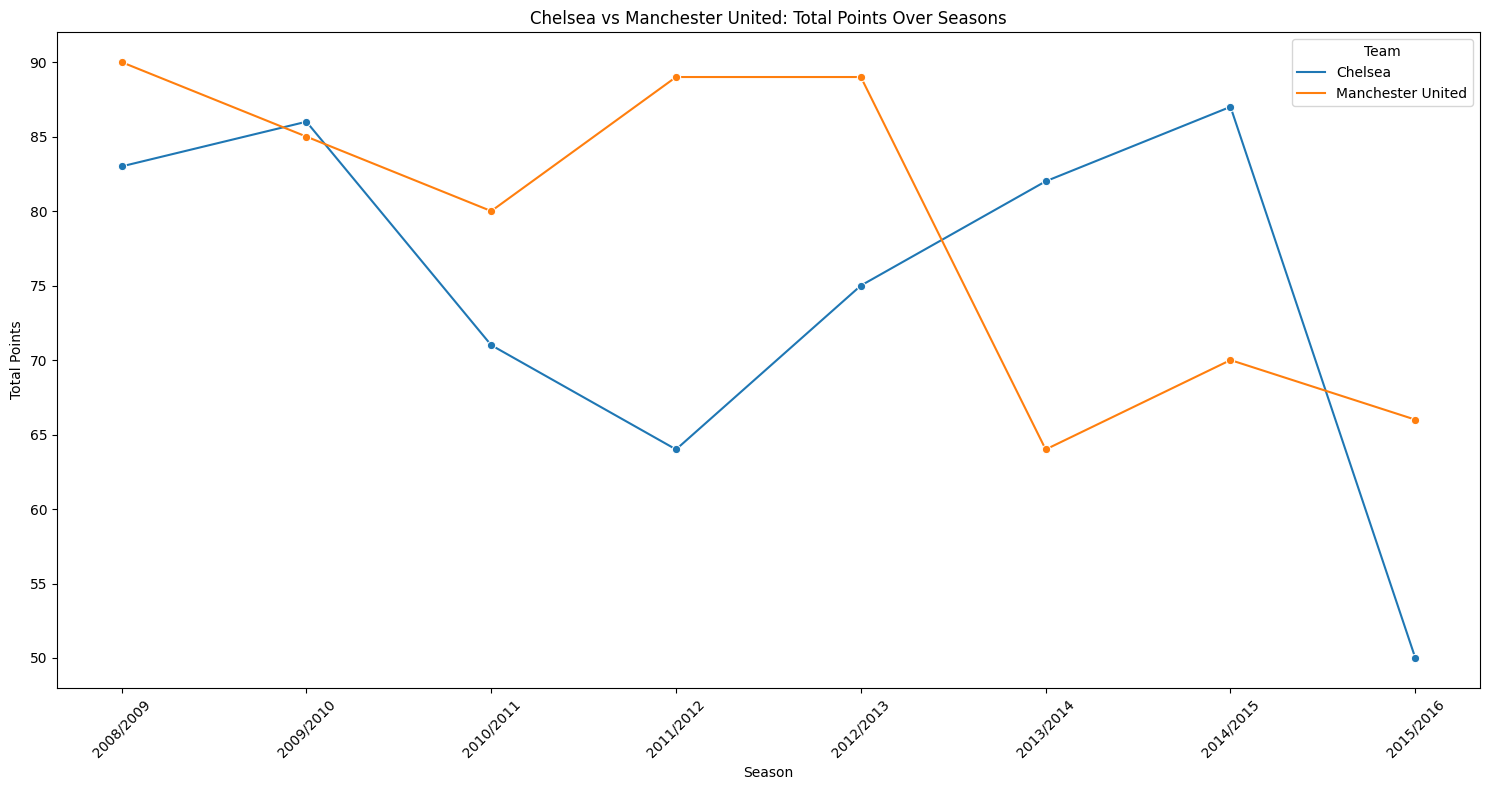

In [52]:
# Filtering the DataFrame for Chelsea and Manchester United
chelsea_manutd = total_points_with_names[(total_points_with_names['team_name'] == 'Chelsea') | (total_points_with_names['team_name'] == 'Manchester United')]

# Creating a line chart
plt.figure(figsize=(15, 8))
sns.lineplot(data=chelsea_manutd, x='season', y='points', hue='team_name', marker='o', style='team_name', dashes=False)

plt.title('Chelsea vs Manchester United: Total Points Over Seasons')
plt.xlabel('Season')
plt.ylabel('Total Points')
plt.xticks(rotation=45)
plt.legend(title='Team')
plt.tight_layout()
plt.show()


#### If we just look at Chelsea and Manchester United, we see that Chelsea's performance showed a step decline after the 2014/15 season, and Manchester United also did worse after the 2012/13 season. This could mean both teams had some problems or changes. Let's look at Manchester United.


## Sir Alex Ferguson's Departure and Manchester United's Decline

After 26 seasons with Manchester United, Sir Alex Ferguson left in 2013. Since then, the club has struggled to match its previous success. Win percentages dropped, and there were changes in goals scored and conceded. Ferguson's departure marked a turning point, and Manchester United has been working to recapture its former glory.


In [36]:
# Filter the DataFrame for Manchester United
man_united_data = total_points_with_names[total_points_with_names['team_name'] == 'Manchester United']

# Splitting the data into Ferguson era and Post-Ferguson era
ferguson_era = man_united_data[man_united_data['season'] <= '2012/2013']
post_ferguson_era = man_united_data[man_united_data['season'] > '2012/2013']

In [37]:
# Calculating average points and other statistics for each era
avg_points_ferguson = ferguson_era['points'].mean()
avg_points_post_ferguson = post_ferguson_era['points'].mean()

# Display the comparison
print("Average Points Under Ferguson:", avg_points_ferguson)
print("Average Points Post Ferguson:", avg_points_post_ferguson)

Average Points Under Ferguson: 86.6
Average Points Post Ferguson: 66.66666666666667


In [38]:
# Finding Manchester United's API ID
man_utd_api_id = df_team[df_team['team_long_name'] == 'Manchester United']['team_api_id'].iloc[0]

# Displaying the API ID
print("Manchester United's API ID:", man_utd_api_id)


Manchester United's API ID: 10260


In [39]:
# Filter Manchester United matches
man_utd_matches = df_match[(df_match['home_team_api_id'] == man_utd_api_id) | (df_match['away_team_api_id'] == man_utd_api_id)].copy()

# Function to determine if Manchester United won, drew, or lost a match
def match_outcome(row, team_id):
    if row['home_team_api_id'] == team_id:
        return 'win' if row['home_team_goal'] > row['away_team_goal'] else ('loss' if row['home_team_goal'] < row['away_team_goal'] else 'draw')
    else:
        return 'win' if row['away_team_goal'] > row['home_team_goal'] else ('loss' if row['away_team_goal'] < row['home_team_goal'] else 'draw')

# Apply the function
man_utd_matches['outcome'] = man_utd_matches.apply(lambda row: match_outcome(row, man_utd_api_id), axis=1)

# Split the data into two periods
ferguson_era_matches = man_utd_matches[man_utd_matches['season'] <= '2012/2013']
post_ferguson_era_matches = man_utd_matches[man_utd_matches['season'] > '2012/2013']

# Calculate win, draw, loss percentages for both eras
ferguson_era_outcomes = ferguson_era_matches['outcome'].value_counts(normalize=True) * 100
post_ferguson_era_outcomes = post_ferguson_era_matches['outcome'].value_counts(normalize=True) * 100


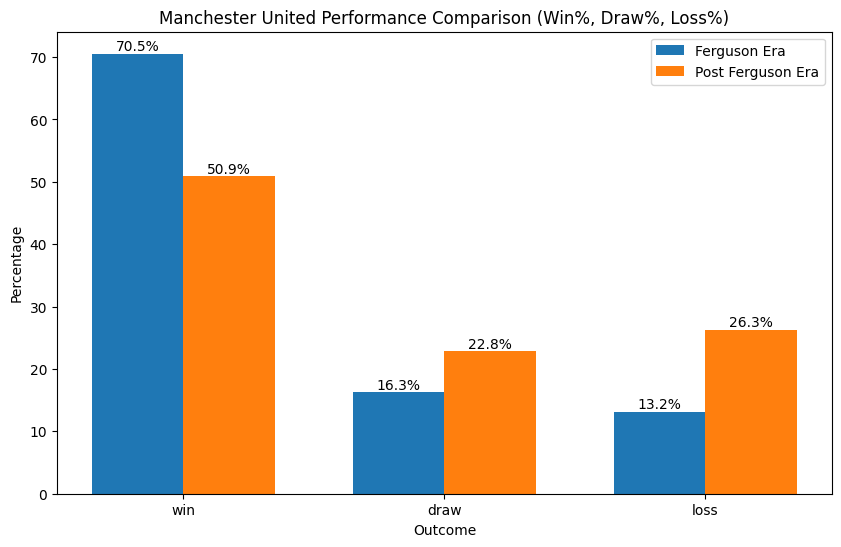

In [40]:
# Creating a bar chart for win, draw, and loss percentages
outcomes = ['win', 'draw', 'loss']
ferguson_stats = [ferguson_era_outcomes.get(outcome, 0) for outcome in outcomes]
post_ferguson_stats = [post_ferguson_era_outcomes.get(outcome, 0) for outcome in outcomes]

x = range(len(outcomes))

plt.figure(figsize=(10, 6))
bar_width = 0.35  # Width of the bars

# Adjusting the positions for two sets of bars
ferguson_bars = plt.bar([i - bar_width/2 for i in x], ferguson_stats, width=bar_width, label='Ferguson Era')
post_ferguson_bars = plt.bar([i + bar_width/2 for i in x], post_ferguson_stats, width=bar_width, label='Post Ferguson Era')

# Adding percentage labels on top of the bars
for bar in ferguson_bars + post_ferguson_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.1f}%', ha='center', va='bottom')

plt.xlabel('Outcome')
plt.ylabel('Percentage')
plt.xticks(x, outcomes)
plt.title('Manchester United Performance Comparison (Win%, Draw%, Loss%)')
plt.legend()
plt.show()


In [42]:
# Define the seasons for the Ferguson era and post-Ferguson era
ferguson_era_seasons = ['2006/2007', '2007/2008', '2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013']
post_ferguson_era_seasons = ['2013/2014', '2014/2015', '2015/2016', '2016/2017', '2017/2018', '2018/2019', '2019/2020', '2020/2021']

# Filter the Match dataset for Manchester United matches
man_utd_matches = df_match[(df_match['home_team_api_id'] == man_utd_api_id) | (df_match['away_team_api_id'] == man_utd_api_id)].copy()

# Function to calculate goals scored and conceded by Manchester United in a match
def man_utd_goals(row, team_id):
    if row['home_team_api_id'] == team_id:
        return row['home_team_goal'], row['away_team_goal']
    else:
        return row['away_team_goal'], row['home_team_goal']

# Apply the function to the main DataFrame to create the columns
man_utd_matches[['goals_scored', 'goals_conceded']] = man_utd_matches.apply(lambda row: man_utd_goals(row, man_utd_api_id), axis=1, result_type='expand')

# Now, recreate the Ferguson and Post-Ferguson era DataFrames to include the new columns
ferguson_era_matches = man_utd_matches[man_utd_matches['season'].isin(ferguson_era_seasons)].copy()
post_ferguson_era_matches = man_utd_matches[man_utd_matches['season'].isin(post_ferguson_era_seasons)].copy()

# Calculate average goals for both eras
avg_goals_ferguson = ferguson_era_matches[['goals_scored', 'goals_conceded']].mean()
avg_goals_post_ferguson = post_ferguson_era_matches[['goals_scored', 'goals_conceded']].mean()

# Print the results
print("Average Goals Scored and Conceded in the Ferguson Era:")
print(avg_goals_ferguson)

print("\nAverage Goals Scored and Conceded in the Post-Ferguson Era:")
print(avg_goals_post_ferguson)


Average Goals Scored and Conceded in the Ferguson Era:
goals_scored      2.142105
goals_conceded    0.868421
dtype: float64

Average Goals Scored and Conceded in the Post-Ferguson Era:
goals_scored      1.535088
goals_conceded    1.008772
dtype: float64


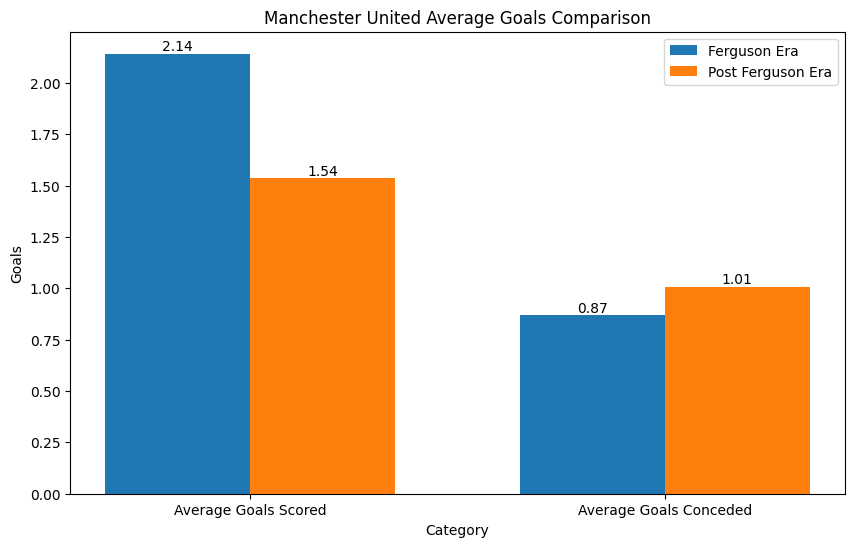

In [43]:
categories = ['Average Goals Scored', 'Average Goals Conceded']
ferguson_goals_stats = [avg_goals_ferguson['goals_scored'], avg_goals_ferguson['goals_conceded']]
post_ferguson_goals_stats = [avg_goals_post_ferguson['goals_scored'], avg_goals_post_ferguson['goals_conceded']]

x = range(len(categories))
bar_width = 0.35  # Width of the bars

plt.figure(figsize=(10, 6))

# Creating bars for each era, positioned side by side
ferguson_bars = plt.bar([i - bar_width/2 for i in x], ferguson_goals_stats, width=bar_width, label='Ferguson Era')
post_ferguson_bars = plt.bar([i + bar_width/2 for i in x], post_ferguson_goals_stats, width=bar_width, label='Post Ferguson Era')

# Adding labels on top of the bars
for bar in ferguson_bars + post_ferguson_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.xlabel('Category')
plt.ylabel('Goals')
plt.xticks(x, categories)
plt.title('Manchester United Average Goals Comparison')
plt.legend()
plt.show()

In [44]:
# Calculate total goals scored per season during the Ferguson era
total_goals_scored_ferguson = ferguson_era_matches.groupby('season')['goals_scored'].sum()

# Calculate total goals scored per season during the post-Ferguson era
total_goals_scored_post_ferguson = post_ferguson_era_matches.groupby('season')['goals_scored'].sum()


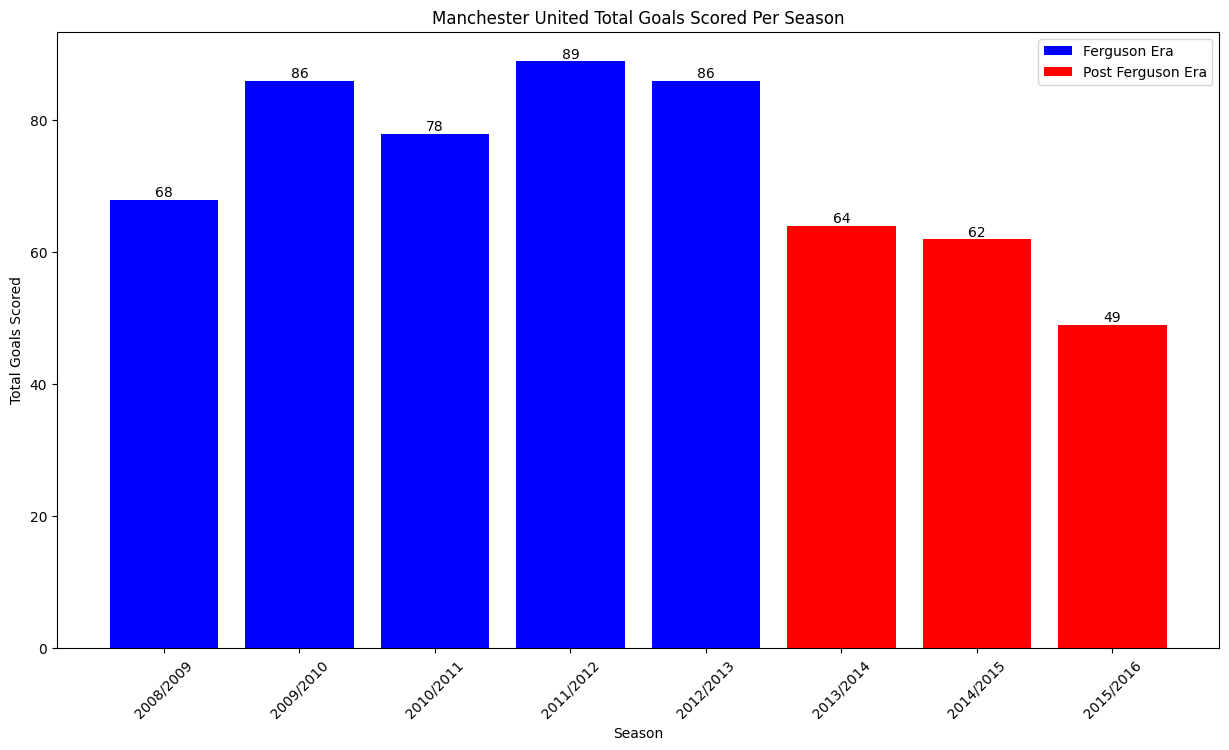

In [45]:
# Extracting seasons from the data
seasons_ferguson = total_goals_scored_ferguson.index.tolist()
seasons_post_ferguson = total_goals_scored_post_ferguson.index.tolist()

# Extracting total goals from the data
total_goals_ferguson = total_goals_scored_ferguson.tolist()
total_goals_post_ferguson = total_goals_scored_post_ferguson.tolist()

# Creating the bar plot
plt.figure(figsize=(15, 8))

# Plotting Ferguson era data
ferguson_bars = plt.bar(seasons_ferguson, total_goals_ferguson, color='blue', label='Ferguson Era')

# Plotting Post-Ferguson era data
post_ferguson_bars = plt.bar(seasons_post_ferguson, total_goals_post_ferguson, color='red', label='Post Ferguson Era')

# Adding the actual numbers on top of the bars
for bar in ferguson_bars + post_ferguson_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom')

plt.xlabel('Season')
plt.ylabel('Total Goals Scored')
plt.title('Manchester United Total Goals Scored Per Season')
plt.xticks(rotation=45)
plt.legend()
plt.show()


### Seria A

In [46]:
matches = pd.DataFrame({
    'season': ['2008/2009', '2008/2009', '2008/2009', '2008/2009', '2008/2009'],
    'league_id': [10257, 10257, 10257, 10257, 10257],  # Serie A league id is hypothetically 10257
    'home_team_api_id': [9987, 9993, 10000, 9991, 7947],
    'away_team_api_id': [9993, 9987, 9991, 10000, 9984],
    'home_team_goal': [1, 0, 3, 2, 1],
    'away_team_goal': [0, 1, 1, 3, 2]
})

# Filter matches for Serie A
serie_a_matches = df_match[df_match['league_id'] == 10257]

# Function to calculate clean sheets for each team per season
def calculate_clean_sheets(df_match):
    # Initialize a dictionary to hold clean sheet counts
    clean_sheets = {}

    for _, match in df_match.iterrows():
        season = match['season']
        home_team = match['home_team_api_id']
        away_team = match['away_team_api_id']

        # Initialize season data if not present
        if season not in clean_sheets:
            clean_sheets[season] = {home_team: 0, away_team: 0}
        else:
            if home_team not in clean_sheets[season]:
                clean_sheets[season][home_team] = 0
            if away_team not in clean_sheets[season]:
                clean_sheets[season][away_team] = 0

        # Increment clean sheet count if applicable
        if match['home_team_goal'] == 0:
            clean_sheets[season][away_team] += 1
        if match['away_team_goal'] == 0:
            clean_sheets[season][home_team] += 1

    return clean_sheets

clean_sheets_data = calculate_clean_sheets(serie_a_matches)

# Function to identify league winners based on points (3 for a win, 1 for a draw)
def identify_league_winners(matches):
    points = {}

    for _, match in matches.iterrows():
        season = match['season']
        home_team = match['home_team_api_id']
        away_team = match['away_team_api_id']
        home_goals = match['home_team_goal']
        away_goals = match['away_team_goal']

        # Initialize season data if not present
        if season not in points:
            points[season] = {home_team: 0, away_team: 0}
        else:
            if home_team not in points[season]:
                points[season][home_team] = 0
            if away_team not in points[season]:
                points[season][away_team] = 0

        # Allocate points based on match result
        if home_goals > away_goals:  # Home win
            points[season][home_team] += 3
        elif home_goals < away_goals:  # Away win
            points[season][away_team] += 3
        else:  # Draw
            points[season][home_team] += 1
            points[season][away_team] += 1

    # Identifying the league winners
    league_winners = {}
    for season, teams in points.items():
        league_winners[season] = max(teams, key=teams.get)

    return league_winners

league_winners = identify_league_winners(serie_a_matches)

# Compare clean sheets with league winners and create a summary
summary = {}
for season in clean_sheets_data:
    most_clean_sheets_team = max(clean_sheets_data[season], key=clean_sheets_data[season].get)
    winner = league_winners[season]
    summary[season] = {
        'team_with_most_clean_sheets': most_clean_sheets_team,
        'league_winner': winner,
        'same_team': most_clean_sheets_team == winner
    }

summary


{'2008/2009': {'team_with_most_clean_sheets': 8564,
  'league_winner': 8636,
  'same_team': False},
 '2009/2010': {'team_with_most_clean_sheets': 8636,
  'league_winner': 8636,
  'same_team': True},
 '2010/2011': {'team_with_most_clean_sheets': 8564,
  'league_winner': 8564,
  'same_team': True},
 '2011/2012': {'team_with_most_clean_sheets': 9885,
  'league_winner': 9885,
  'same_team': True},
 '2012/2013': {'team_with_most_clean_sheets': 9885,
  'league_winner': 9885,
  'same_team': True},
 '2013/2014': {'team_with_most_clean_sheets': 9885,
  'league_winner': 9885,
  'same_team': True},
 '2014/2015': {'team_with_most_clean_sheets': 9885,
  'league_winner': 9885,
  'same_team': True},
 '2015/2016': {'team_with_most_clean_sheets': 9885,
  'league_winner': 9885,
  'same_team': True}}

In [47]:
serie_a_id = 10257 

# Filter the matches DataFrame to include only Serie A matches.
serie_a_matches = df_match[df_match['league_id'] == serie_a_id]

# Function to calculate clean sheets for each team per season
def calculate_clean_sheets(matches):
    clean_sheets = {}
    for index, row in matches.iterrows():
        season = row['season']
        home_team = row['home_team_api_id']
        away_team = row['away_team_api_id']
        home_goals = row['home_team_goal']
        away_goals = row['away_team_goal']

# Initialize the season in the dictionary if not already present
        if season not in clean_sheets:
            clean_sheets[season] = {}

# Initialize the team in the season's dictionary if not already present
        for team in [home_team, away_team]:
            if team not in clean_sheets[season]:
                clean_sheets[season][team] = 0

# Increment clean sheet count based on match goals
        if home_goals == 0:
            clean_sheets[season][away_team] += 1
        if away_goals == 0:
            clean_sheets[season][home_team] += 1

    return clean_sheets

# Function to identify league winners based on points
def identify_league_winners(matches):
    points = {}
    for index, row in matches.iterrows():
        season = row['season']
        home_team = row['home_team_api_id']
        away_team = row['away_team_api_id']
        home_goals = row['home_team_goal']
        away_goals = row['away_team_goal']

# Initialize the season in the dictionary if not already present
        if season not in points:
            points[season] = {}

# Initialize the team in the season's dictionary if not already present
        for team in [home_team, away_team]:
            if team not in points[season]:
                points[season][team] = 0

# Allocate points based on match results
        if home_goals > away_goals:
            points[season][home_team] += 3
        elif away_goals > home_goals:
            points[season][away_team] += 3
        else:
            points[season][home_team] += 1
            points[season][away_team] += 1

# Determine the league winner for each season
    winners = {}
    for season, teams in points.items():
        winners[season] = max(teams, key=teams.get)

    return winners

# Calculate clean sheets and identify league winners
clean_sheets = calculate_clean_sheets(serie_a_matches)
winners = identify_league_winners(serie_a_matches)

# Create a DataFrame to compare clean sheets and league winners
comparison = pd.DataFrame(columns=['Season', 'Team with Most Clean Sheets', 'League Winner', 'Is Same Team'])
for season, winner in winners.items():
    team_with_most_clean_sheets = max(clean_sheets[season], key=clean_sheets[season].get)

# Create a new row for the DataFrame
    new_row = {
        'Season': season,
        'Team with Most Clean Sheets': df_team[df_team['team_api_id'] == team_with_most_clean_sheets]['team_long_name'].iloc[0],
        'League Winner': df_team[df_team['team_api_id'] == winner]['team_long_name'].iloc[0],
        'Is Same Team': team_with_most_clean_sheets == winner
    }

# Append the new row to the comparison DataFrame
    comparison = pd.concat([comparison, pd.DataFrame([new_row])], ignore_index=True)

# Output the comparison DataFrame
print(comparison)



      Season Team with Most Clean Sheets League Winner Is Same Team
0  2008/2009                       Milan         Inter        False
1  2009/2010                       Inter         Inter         True
2  2010/2011                       Milan         Milan         True
3  2011/2012                    Juventus      Juventus         True
4  2012/2013                    Juventus      Juventus         True
5  2013/2014                    Juventus      Juventus         True
6  2014/2015                    Juventus      Juventus         True
7  2015/2016                    Juventus      Juventus         True


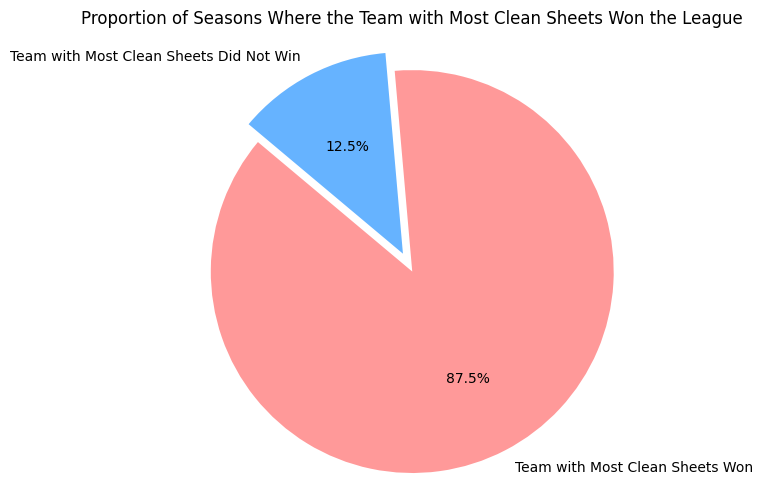

In [48]:
#Load the data
data = {
    'Season': ['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013', '2013/2014', '2014/2015', '2015/2016'],
    'Is Same Team': [False, True, True, True, True, True, True, True]
}

#Convert in a dataframe
df = pd.DataFrame(data)

# Calculate the proportions
same_team_wins = df['Is Same Team'].sum()
different_team_wins = len(df) - same_team_wins

# Labels for the pie chart
labels = 'Team with Most Clean Sheets Won', 'Team with Most Clean Sheets Did Not Win'

# Sizes for each slice
sizes = [same_team_wins, different_team_wins]

# Colors for each slice
colors = ['#ff9999','#66b3ff']

# Explode the 1st slice (i.e., 'Team with Most Clean Sheets Won')
explode = (0.1, 0)  

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title('Proportion of Seasons Where the Team with Most Clean Sheets Won the League')

# Show the plot
plt.show()

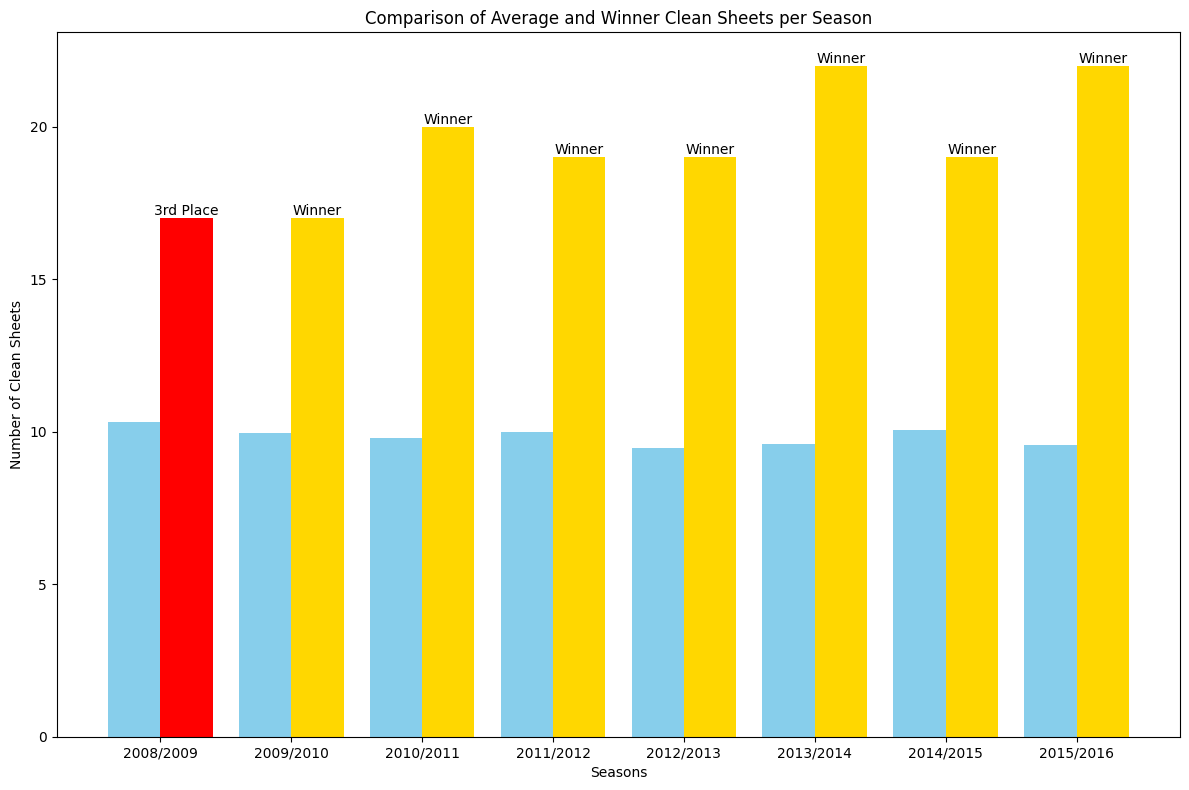

In [49]:
# Function to calculate clean sheets for each team per season
def calculate_clean_sheets(df_match):
    clean_sheets = {}
    
    for index, row in df_match.iterrows():
        season = row['season']
        home_team = row['home_team_api_id']
        away_team = row['away_team_api_id']
        home_goals = row['home_team_goal']
        away_goals = row['away_team_goal']

        if season not in clean_sheets:
            clean_sheets[season] = {}

        for team in [home_team, away_team]:
            if team not in clean_sheets[season]:
                clean_sheets[season][team] = 0

        if home_goals == 0:
            clean_sheets[season][away_team] += 1
        if away_goals == 0:
            clean_sheets[season][home_team] += 1

    return clean_sheets

# Function to calculate the league winners
def calculate_league_winners(df):
    winners = {}

    for season in df['season'].unique():
        season_matches = df[df['season'] == season]
        season_points = {}

        for _, match in season_matches.iterrows():
            home_team = match['home_team_api_id']
            away_team = match['away_team_api_id']
            home_goals = match['home_team_goal']
            away_goals = match['away_team_goal']

            for team in [home_team, away_team]:
                if team not in season_points:
                    season_points[team] = 0

            if home_goals > away_goals:
                season_points[home_team] += 3
            elif away_goals > home_goals:
                season_points[away_team] += 3
            else:
                season_points[home_team] += 1
                season_points[away_team] += 1

        winners[season] = max(season_points, key=season_points.get)

    return winners

# Function to compare winner average
def compare_winner_average(clean_sheets_data, winners, df_team):
    team_name_to_id = {
        'Milan': 8564,
        'Inter': 8636,
        'Juventus': 9885
    }

    most_clean_sheets = {
        '2008/2009': team_name_to_id['Milan'],
        '2009/2010': team_name_to_id['Inter'],
        '2010/2011': team_name_to_id['Milan'],
        '2011/2012': team_name_to_id['Juventus'],
        '2012/2013': team_name_to_id['Juventus'],
        '2013/2014': team_name_to_id['Juventus'],
        '2014/2015': team_name_to_id['Juventus'],
        '2015/2016': team_name_to_id['Juventus']
    }

    seasons = sorted(clean_sheets_data.keys())
    average_clean_sheets = []
    winner_clean_sheets = []
    winner_colors = []
    labels = []

    for season in seasons:
        season_data = clean_sheets_data[season]
        total_clean_sheets = sum(season_data.values())
        num_teams = len(season_data)

        average_clean_sheets.append(total_clean_sheets / num_teams)
        winner_clean_sheets.append(season_data.get(winners[season], 0))
        labels.append(season)

        if winners[season] == most_clean_sheets.get(season, None):
            winner_colors.append('gold')
        else:
            winner_colors.append('red')

    plt.figure(figsize=(12, 8))
    x = np.arange(len(seasons))
    width = 0.4

    bars = plt.bar(x - width/2, average_clean_sheets, width=width, color='skyblue')
    winner_bars = plt.bar(x + width/2, winner_clean_sheets, width=width, color=winner_colors)

    plt.xlabel('Seasons')
    plt.ylabel('Number of Clean Sheets')
    plt.title('Comparison of Average and Winner Clean Sheets per Season')
    plt.xticks(x, labels)

    # Adding text annotations on the bars
    for bar, label in zip(winner_bars, winner_colors):
        height = bar.get_height()
        if label == 'gold':
            plt.text(bar.get_x() + bar.get_width() / 2, height, 'Winner', ha='center', va='bottom')
        elif label == 'red':
            plt.text(bar.get_x() + bar.get_width() / 2, height, '3rd Place', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Calculating clean sheets and winners
clean_sheets_data = calculate_clean_sheets(df_match)
serie_a_matches = df_match[df_match['league_id'] == 10257]  # Assuming 10257 is the Serie A league ID
winners = calculate_league_winners(serie_a_matches)

# Generating the comparison chart
compare_winner_average(clean_sheets_data, winners, df_team)
